In [ ]:
# Practical 1B Convert the given text to speech.

In [ ]:
pip install gTTS

In [ ]:
from gtts import gTTS
mytext = "Welcome to Natural Language programming"
language = "en"
myobj = gTTS(text=mytext, lang=language, slow=False)
myobj.save("myfile.mp3")

In [ ]:
# Practical 1C Convert audio file Speech to Text.

In [ ]:
pip install SpeechRecognition pydub


In [ ]:
import speech_recognition as sr
filename = "/content/best_4_less.wav"
r = sr.Recognizer()
with sr.AudioFile(filename) as source:
  audio_data = r.record(source)
  text = r.recognize_google(audio_data)
  print(text)

In [ ]:
# Practical 2A a. Study of various Corpus – Brown, Inaugural, Reuters, udhr with various methods like filelds, raw, words, sents, categories.

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
import nltk
from nltk.corpus import brown
print ('File ids of brown corpus\n',brown.fileids())
ca01 = brown.words('ca01')
# display first few words
print('\nca01 has following words:\n',ca01)
# total number of words in ca01
print('\nca01 has',len(ca01),'words')
#categories or files
print('\n\nCategories or file in brown corpus:\n')
print(brown.categories())

print('\n\nStatistics for each text:\n')
print('AvgWordLen\tAvgSentenceLen\tno.ofTimesEachWordAppearsOnAvg\t\tFileName')
for fileid in brown.fileids():
  num_chars = len(brown.raw(fileid))
  num_words = len(brown.words(fileid))
  num_sents = len(brown.sents(fileid))
  num_vocab = len(set([w.lower() for w in brown.words(fileid)]))
  print (int(num_chars/num_words),'\t\t\t', int(num_words/num_sents),'\t\t\t', int(num_words/num_vocab),'\t\t\t', fileid)

In [ ]:
# 2B  Create and use your own corpora (plaintext, categorical)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/content'
filelist = PlaintextCorpusReader(corpus_root, '.*')

print('\n File list: \n')
print(filelist.fileids())
print(filelist.root)
print('\n\nStatistics for each text:\n')
print('AvgWordLen\tAvgSentenceLen\tno.ofTimesEachWordAppearsOnAvg\tFileName')

for fileid in filelist.fileids():
    try:
        num_chars = len(filelist.raw(fileid))
        num_words = len(filelist.words(fileid))
        num_sents = len(filelist.sents(fileid))
        num_vocab = len(set([w.lower() for w in filelist.words(fileid)]))

        if num_words > 0 and num_sents > 0 and num_vocab > 0:
            print(int(num_chars/num_words), '\t\t\t', int(num_words/num_sents), '\t\t\t', int(num_words/num_vocab), '\t\t', fileid)
    except UnicodeDecodeError:
        print(f"Skipping non-text file: {fileid}")


In [ ]:
# Practical 2C.	Study Conditional frequency distributions

In [ ]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [ ]:
nltk.download('udhr')

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.


True

In [ ]:
import nltk
from nltk.corpus import brown

# Process a sequence of pairs
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

fd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

genre_word = [(genre, word) for genre in ['news', 'romance'] for word in brown.words(categories=genre)]
print(len(genre_word))
print(genre_word[:4])
print(genre_word[-4:])

cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)
print(cfd.conditions())
print(cfd['news'])
print(cfd['romance'])
print(list(cfd['romance']))

from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1')
)

cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(10), cumulative=True)


170576
[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]
<ConditionalFreqDist with 2 conditions>
['news', 'romance']
<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>
[',', '.', 'the', 'and', 'to', 'a', 'of', '``', "''", 'was', 'I', 'in', 'he', 'had', '?', 'her', 'that', 'it', 'his', 'she', 'with', 'you', 'for', 'at', 'He', 'on', 'him', 'said', '!', '--', 'be', 'as', ';', 'have', 'but', 'not', 'would', 'She', 'The', 'out', 'were', 'up', 'all', 'from', 'could', 'me', 'like', 'been', 'so', 'there', 'they', 'one', 'about', 'my', 'an', 'or', 'is', 'this', 'It', 'them', 'if', 'into', 'But', 'And', 'down', 'when', 'back', 'no', 'what', 'did', 'their', 'do', 'by', 'only', 'your', 'thought', 'which', 'You', "didn't", 'then', 'just', 'little', 'time', 'too', 'get', 'who', 'got', 'before', 'know', 'over', 'man', 'because', 'more', 'never', 'w

In [ ]:
# Practical 2D : Study of tagged corpora with methods like tagged_sents, tagged_words.

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk import tokenize

para = "Hello! My name is Beena Kapadia. Today you'll be learning NLTK."
sents = tokenize.sent_tokenize(para)
print("\nSentence Tokenization\n===================")
for sent in sents:
    print(sent)

print("\nWord Tokenization\n===================")
for sent in sents:
    words = tokenize.word_tokenize(sent)
    print(words)



Sentence Tokenization
Hello!
My name is Beena Kapadia.
Today you'll be learning NLTK.

Word Tokenization
['Hello', '!']
['My', 'name', 'is', 'Beena', 'Kapadia', '.']
['Today', 'you', "'ll", 'be', 'learning', 'NLTK', '.']


In [ ]:
# Practical 2E : Write a program to find the most frequent noun tags.

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
from collections import defaultdict

text = nltk.word_tokenize("Nick likes to play football. Nick does not like to play cricket.")
tagged = nltk.pos_tag(text)
print(tagged)

# Checking if it is a noun or not
addNounWords = []
count = 0
for word, tag in tagged:
    if tag in ['NN', 'NNS', 'NNPS', 'NNP']:
        addNounWords.append(word)
    count += 1

print(addNounWords)

temp = defaultdict(int)
# Memoizing count
for sub in addNounWords:
    for wrd in sub.split():
        temp[wrd] += 1

# Getting max frequency
res = max(temp, key=temp.get)

# Printing result
print("Word with maximum frequency: " + str(res))


[('Nick', 'NNP'), ('likes', 'VBZ'), ('to', 'TO'), ('play', 'VB'), ('football', 'NN'), ('.', '.'), ('Nick', 'NNP'), ('does', 'VBZ'), ('not', 'RB'), ('like', 'VB'), ('to', 'TO'), ('play', 'VB'), ('cricket', 'NN'), ('.', '.')]
['Nick', 'football', 'Nick', 'cricket']
Word with maximum frequency: Nick


In [ ]:
# Practical 2F : Map Words to Properties Using Python Dictionaries code:

In [ ]:
thisdict = {
    "brand": "Ford",
    "model": "Mustang",
    "year": 1964
}

print(thisdict)
print(thisdict["brand"])

print(len(thisdict))
print(type(thisdict))


{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
Ford
3
<class 'dict'>


In [ ]:
# Practical 2G : Study i) DefaultTagger, ii) Regular expression tagger, iii) UnigramTagger

In [ ]:
# i)	DefaultTagger

In [ ]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
import nltk
from nltk.tag import DefaultTagger

exptagger = DefaultTagger('NN')

from nltk.corpus import treebank

testsentences = treebank.tagged_sents()[1000:]
print(exptagger.evaluate(testsentences))

# Tagging a list of sentences
import nltk
from nltk.tag import DefaultTagger

exptagger = DefaultTagger('NN')
sentences = [['Hi', ','], ['How', 'are', 'you', '?']]

for tagged_sentence in exptagger.tag_sents(sentences):
    print(tagged_sentence)


<ipython-input-27-4586b4b65de0>:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(exptagger.evaluate(testsentences))


0.13198749536374715
[('Hi', 'NN'), (',', 'NN')]
[('How', 'NN'), ('are', 'NN'), ('you', 'NN'), ('?', 'NN')]


In [ ]:
# ii) Regular expression tagger

In [ ]:
nltk.download('treebank')

In [ ]:
from nltk.corpus import brown
from nltk.tag import RegexpTagger

test_sent = brown.sents(categories='news')[0]

regexp_tagger = RegexpTagger([
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),     # cardinal numbers
    (r'(The|the|A|a|An|an)$', 'AT'),     # articles
    (r'.*able$', 'JJ'),                  # adjectives
    (r'.*ness$', 'NN'),                  # nouns formed from adjectives
    (r'.*ly$', 'RB'),                    # adverbs
    (r'.*s$', 'NNS'),                    # plural nouns
    (r'.*ing$', 'VBG'),                  # gerunds
    (r'.*ed$', 'VBD'),                   # past tense verbs
    (r'.*', 'NN')                        # nouns (default)
])

print(regexp_tagger)
print(regexp_tagger.tag(test_sent))


In [ ]:
# iii)	UnigramTagger

In [ ]:
nltk.download('treebank')

In [ ]:
from nltk.tag import UnigramTagger
from nltk.corpus import treebank

# Training using the first 10 tagged sentences of the treebank corpus as data.
train_sents = treebank.tagged_sents()[:10]

# Initializing the tagger
tagger = UnigramTagger(train_sents)

# Printing the first sentence of the treebank corpus as a list
print(treebank.sents()[0])

# Printing the tagged result after tagging the first sentence using the tagger
print(tagger.tag(treebank.sents()[0]))

# Finding the tagged results after training
print(tagger.tag(treebank.sents()[0]))

# Overriding the context model
tagger = UnigramTagger(model={'Pierre': 'NN'})
print('\n', tagger.tag(treebank.sents()[0]))


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]

 [('Pierre', 'NN'), ('Vinken', None), (',', None), ('61', None), ('years', None), ('old', None), (',', None), ('will', None), ('join', None), ('the', None), ('board', None), ('as', None), ('a', None), ('nonexecutive', None), ('director', None), ('Nov.', None), ('29', None), ('.',

In [ ]:
# # Practical 2H : Find different words from a given plain text without any space by comparing this text with
#  a given corpus of words. Also find the score of words.

In [ ]:
from __future__ import with_statement  # Importing with statement for reading file
import re  # Regular expression

words = []  # Corpus file words
testword = []  # Test words
ans = []  # Words matches with corpus

print("MENU")
print("-----------")
print(" 1 . Hash tag segmentation ")
print(" 2 . URL segmentation ")
print("enter the input choice for performing word segmentation")

choice = int(input())

if choice == 1:
    text = "#whatismyname"  # Hash tag test data to segment
    print("input with HashTag", text)
    pattern = re.compile("[^\w']")
    a = pattern.sub('', text)
elif choice == 2:
    text = "www.mynameispawan.com"  # URL test data to segment
    print("input with URL", text)
    a = re.split('\s|(?<!\d)[,.](?!\d)', text)
    splitwords = ["www", "com", "in"]  # remove the words which is containg in the list
    a = "".join([each for each in a if each not in splitwords])
else:
    print("wrong choice...try again")
    exit()

print(a)

for each in a:
  testword.append(each)  # Test word

test_lenth = len(testword)  # Length of the test data

# Reading the corpus
with open('/content/words.txt', 'r') as f:
    lines = f.readlines()
    words = [(e.strip()) for e in lines]


def Seg(a, lenth):
    ans = []
    for k in range(0, lenth + 1):  # this loop checks char by char in the corpus
        if a[0:k] in words:
            print(a[0:k], "-appears in the corpus")
            ans.append(a[0:k])
            break
    if ans != []:
        g = max(ans, key=len)
        return g


test_tot_itr = 0  # each iteration value
answer = []  # Store the each word contains the corpus
Score = 0  # initial value for score
N = 37  # total no of corpus
M = 0
C = 0

while test_tot_itr < test_lenth:
    ans_words = Seg(a, test_lenth)
    if ans_words != 0:
        test_itr = len(ans_words)
        answer.append(ans_words)
        a = a[test_itr:test_lenth]
        test_tot_itr += test_itr

Aft_Seg = " ".join([each for each in answer])
# print segmented words in the list
print("output")
print("---------")
print(Aft_Seg)  # print After segmentation the input

# Calculating Score
C = len(answer)
score = C * N / N  # Calculate the score
print("Score", score)


In [ ]:
# Make a words.txt file then paste the below words and upload in the left side content folder

check
domain
big
rocks
name
cheap
being
human
current
rates
ought
to
go
down
apple
domains
honesty
hour
follow
back
social
media
30
seconds
earth
this
is
insane
it
time
what
is
my
name
let
us
go
pawan
name

In [ ]:
# Practical 3A : Study of Wordnet Dictionary with methods as synsets, definitions, examples, antonyms

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import wordnet

print(wordnet.synsets("computer"))

# Definition and example of the word ‘computer’
print(wordnet.synset("computer.n.01").definition())

# Examples
print("Examples:", wordnet.synset("computer.n.01").examples())

# Get Antonyms
print(wordnet.lemma('buy.v.01.buy').antonyms())


[Synset('computer.n.01'), Synset('calculator.n.01')]
a machine for performing calculations automatically
Examples: []
[Lemma('sell.v.01.sell')]


In [ ]:
# Practical 3B: Study lemmas, hyponyms, hypernyms

In [ ]:
nltk.download('wordnet')

In [ ]:
import nltk
from nltk.corpus import wordnet

print(wordnet.synsets("computer"))
print(wordnet.synset("computer.n.01").lemma_names())  # all lemmas for each synset.
for e in wordnet.synsets("computer"):
    print(f'{e} --> {e.lemma_names()}')

# print all lemmas for a given synset
print(wordnet.synset('computer.n.01').lemmas())

# get the synset corresponding to lemma
print(wordnet.lemma('computer.n.01.computing_device').synset())

# Get the name of the lemma
print(wordnet.lemma('computer.n.01.computing_device').name())

# Hyponyms give abstract concepts of the word that are much more specific
# the list of hyponyms words of the computer

syn = wordnet.synset('computer.n.01')
print(syn.hyponyms())
print([lemma.name() for synset in syn.hyponyms() for lemma in synset.lemmas()])

# the semantic similarity in WordNet
vehicle = wordnet.synset('vehicle.n.01')
car = wordnet.synset('car.n.01')

print(car.lowest_common_hypernyms(vehicle))


[Synset('computer.n.01'), Synset('calculator.n.01')]
['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system']
Synset('computer.n.01') --> ['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system']
Synset('calculator.n.01') --> ['calculator', 'reckoner', 'figurer', 'estimator', 'computer']
[Lemma('computer.n.01.computer'), Lemma('computer.n.01.computing_machine'), Lemma('computer.n.01.computing_device'), Lemma('computer.n.01.data_processor'), Lemma('computer.n.01.electronic_computer'), Lemma('computer.n.01.information_processing_system')]
Synset('computer.n.01')
computing_device
[Synset('analog_computer.n.01'), Synset('digital_computer.n.01'), Synset('home_computer.n.01'), Synset('node.n.08'), Synset('number_cruncher.n.02'), Synset('pari-mutuel_machine.n.01'), Synset('predictor.n.03'), Synset('server.n.03'), Synset('turing_machine.n.01'), Synset('we

In [ ]:
# Practical 3C : Write a program using python to find synonym and antonym of word "active" using Wordnet.

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

print(wordnet.synsets("active"))

print(wordnet.lemma('active.a.01.active').antonyms())

[Synset('active_agent.n.01'), Synset('active_voice.n.01'), Synset('active.n.03'), Synset('active.a.01'), Synset('active.s.02'), Synset('active.a.03'), Synset('active.s.04'), Synset('active.a.05'), Synset('active.a.06'), Synset('active.a.07'), Synset('active.s.08'), Synset('active.a.09'), Synset('active.a.10'), Synset('active.a.11'), Synset('active.a.12'), Synset('active.a.13'), Synset('active.a.14')]
[Lemma('inactive.a.02.inactive')]


In [ ]:
# Practical 3D : Write a program using python to find synonym and antonym of word "active" using Wordnet.

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

print(wordnet.synsets("active"))

print(wordnet.lemma('active.a.01.active').antonyms())

import nltk
from nltk.corpus import wordnet

syn1 = wordnet.synsets('football')
syn2 = wordnet.synsets('soccer')

# A word may have multiple synsets, so need to compare each synset of word1 with synset of word2
for s1 in syn1:
    for s2 in syn2:
        print("Path similarity of: ")
        print(s1, '(', s1.pos(), ')', '[', s1.definition(), ']')
        print(s2, '(', s2.pos(), ')', '[', s2.definition(), ']')
        print(" is", s1.path_similarity(s2))
        print()


In [ ]:
# Practical 3E : Handling stopword:

In [ ]:
# i)	Using nltk Adding or Removing Stop Words in NLTK's Default Stop Word List

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

from nltk.tokenize import word_tokenize

text = "Yashesh likes to play football, however he is not too fond of tennis."

text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

# Add the word 'play' to the NLTK stop word collection
all_stopwords = stopwords.words('english')
all_stopwords.append('play')

text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
print(tokens_without_sw)

# Remove ‘not’ from stop word collection
all_stopwords.remove('not')

text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
print(tokens_without_sw)


['Yashesh', 'likes', 'play', 'football', ',', 'fond', 'tennis', '.']
['Yashesh', 'likes', 'football', ',', 'however', 'fond', 'tennis', '.']
['Yashesh', 'likes', 'football', ',', 'however', 'not', 'fond', 'tennis', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ii)	Using Gensim Adding and Removing Stop Words in Default Gensim Stop Words List

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

text = "Yashesh likes to play football, however he is not too fond of tennis."
filtered_sentence = remove_stopwords(text)

print(filtered_sentence)

import gensim
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

# Add 'likes' and 'play' to the list of stop words in Gensim
from gensim.parsing.preprocessing import STOPWORDS
all_stopwords_gensim = STOPWORDS.union(set(['likes', 'play']))

text = "Yashesh likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]

print(tokens_without_sw)

# Remove the word "not" from the set of stop words in Gensim
from gensim.parsing.preprocessing import STOPWORDS
all_stopwords_gensim = STOPWORDS
sw_list = {"not"}
all_stopwords_gensim = all_stopwords_gensim.difference(sw_list)

text = "Yashesh likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]

print(tokens_without_sw)


Yashesh likes play football, fond tennis.
frozenset({'whose', 'cannot', 'becoming', 'next', 'without', 'either', 'noone', 'this', 'fill', 'by', 'in', 'had', 'whereupon', 'those', 'have', 'due', 'found', 'about', 'un', 'sometimes', 'seem', 'move', 'out', 'along', 'moreover', 'thereby', 'own', 'bill', 'mill', 'into', 'same', 'keep', 'former', 'also', 'more', 'indeed', 'thru', 'these', 'below', 'somehow', 'did', 'whereafter', 'ours', 'they', 'alone', 'thus', 'on', 'a', 'hence', 'front', 'would', 'fire', 'nine', 'hereafter', 'except', 'his', 'still', 'really', 'therein', 'so', 'therefore', 'but', 'hereupon', 'herself', 'across', 'thin', 'were', 'system', 'latterly', 'amoungst', 'been', 'off', 'kg', 'anywhere', 'ie', 'between', 'fifty', 'back', 'at', 'my', 'via', 'who', 'almost', 'very', 'your', 'then', 'toward', 'hasnt', 'yet', 'together', 'whence', 'until', 'might', 'rather', 'thereupon', 'sometime', 'sixty', 'or', 'whereby', 'every', 'all', 'through', 'you', 'twelve', 'thick', 'see', 'al

In [ ]:
# iii) Using Spacy Adding and Removing Stop Words in Default Spacy Stop Words List

In [ ]:
import spacy
import nltk
from nltk.tokenize import word_tokenize

sp = spacy.load('en_core_web_sm')
# Get the default stop words from Spacy
all_stopwords = sp.Defaults.stop_words
# Add "play" to the stop words
all_stopwords.add("play")

text = "Yashesh likes to play football, however he is not too fond of tennis."
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
print(tokens_without_sw)

# Remove 'not' from the stop word collection
all_stopwords.remove('not')

# Reapply the stop word removal
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
print(tokens_without_sw)


['Yashesh', 'likes', 'football', ',', 'fond', 'tennis', '.']
['Yashesh', 'likes', 'football', ',', 'not', 'fond', 'tennis', '.']


In [ ]:
# Practical 4 : Text Tokenization

In [ ]:
## a. Tokenization using Python’s split() function

text = """ This tool is an a beta stage. Alexa developers can use Get Metrics API to seamlessly
analyse metric. It also supports custom skill model, prebuilt Flash Briefingmodel, and the
Smart Home Skill API. You can use this tool for creation of monitors, alarms, and dashboards
that spotlight changes. The release of these three tools will enable developers to create visual
rich skills for Alexa devices with screens. Amazon describes these tools as the collection of
tech and tools for creating visually rich and interactive voice experiences. """
data = text.split('.')
for i in data:
  print (i)

## b. Tokenization using Regular Expressions (RegEx)
import nltk
from nltk.tokenize import RegexpTokenizer
# Create a reference variable for RegexpTokenizer
RegexpTokenizer_tk = RegexpTokenizer('\s+', gaps = True)
# Create a string input
str = "I love to study Natural Language Processing in Python"
# Use tokenize method
tokens = RegexpTokenizer_tk.tokenize(str)
print(tokens)


## c.  Tokenization using NLTK
import nltk
from nltk.tokenize import RegexpTokenizer
# Create a reference variable for RegexpTokenizer
RegexpTokenizer_tk = RegexpTokenizer('\s+', gaps = True)
# Create a string input
str = "I love to study Natural Language Processing in Python"
# Use tokenize method
tokens = RegexpTokenizer_tk.tokenize(str)
print(tokens)

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# Create a string input
str = "I love to study Natural Language Processing in Python"
# Use tokenize method
print(word_tokenize(str))


## d. Tokenization using the spaCy library
import spacy
nlp = spacy.blank("en")
# Create a string input
str = "I love to study Natural Language Processing in Python"
# Create an instance of document;
# doc object is a container for a sequence of Token
doc = nlp(str)
# Read the words; Print the words#
words = [word.text for word in doc]
print(words)


## e. Tokenization using Keras
#pip install keras
#pip install tensorflow
import keras
from keras.preprocessing.text import text_to_word_sequence # Createa string input
str = "I love to study Natural Language Processing in Python"
# tokenizing the text
tokens = text_to_word_sequence(str)
print(tokens)


## f. c. Tokenization using Gensim
#pip install gensim
from gensim.utils import tokenize # Create a string input
str = "I love to study Natural Language Processing in Python"
# tokenizing the text
list(tokenize(str))

 This tool is an a beta stage
 Alexa developers can use Get Metrics API to seamlessly
analyse metric
 It also supports custom skill model, prebuilt Flash Briefingmodel, and the
Smart Home Skill API
 You can use this tool for creation of monitors, alarms, and dashboards
that spotlight changes
 The release of these three tools will enable developers to create visual
rich skills for Alexa devices with screens
 Amazon describes these tools as the collection of
tech and tools for creating visually rich and interactive voice experiences
 
['I', 'love', 'to', 'study', 'Natural', 'Language', 'Processing', 'in', 'Python']
['I', 'love', 'to', 'study', 'Natural', 'Language', 'Processing', 'in', 'Python']
['I', 'love', 'to', 'study', 'Natural', 'Language', 'Processing', 'in', 'Python']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'love', 'to', 'study', 'Natural', 'Language', 'Processing', 'in', 'Python']
['i', 'love', 'to', 'study', 'natural', 'language', 'processing', 'in', 'python']


['I',
 'love',
 'to',
 'study',
 'Natural',
 'Language',
 'Processing',
 'in',
 'Python']

In [ ]:
# Practical 5 : Import NLP Libraries for Indian Languages and perform:

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install tornado==4.5.3

In [ ]:
!pip install inltk

In [ ]:
# Move the setup('hi') call after importing the necessary modules.
from inltk.inltk import tokenize
from collections import abc, Counter, defaultdict, namedtuple, OrderedDict
from collections.abc import Iterable
from inltk.inltk import setup
setup('hi')
hindi_text = """ र क त क भ ष खन बह त त लच ह ।"""
# tokenize(input text, language code)
tokenize(hindi_text, "hi")
setup('hi')

In [ ]:
##.....Generate similar sentences from a given Hindi text input
from inltk.inltk import setup
setup('hi')
from inltk.inltk import get_similar_sentences
# get similar sentences to the one given in hindi
output = get_similar_sentences('म आज ब त ख¸श ह ', 5,'hi')
print(output)

In [ ]:
##.....Identify the Indian language of a text

!pip install torch==1.3.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
!pip install inltk
!pip install tornado==4.5.3
from inltk.inltk import setup
setup('gu')
from inltk.inltk import identify_language
#Identify the Lnaguage of given text
identify_language(' ')


In [ ]:
# Practical 6 : Illustrate part of speech tagging.

In [ ]:
# A) Part of speech Tagging and chunking of user defined text.

In [6]:
import nltk
from nltk import tokenize
nltk.download('punkt')
from nltk import tag
from nltk import chunk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
para = "Hello! My name is Beena Kapadia. Today you'll be learning NLTK."
sents = tokenize.sent_tokenize(para)
print("\nsentence tokenization\n===================\n",sents)
print("\nword tokenization\n===================\n")
for index in range(len(sents)):
  words = tokenize.word_tokenize(sents[index])
  print(words)
tagged_words = []
for index in range(len(sents)):
  tagged_words.append(tag.pos_tag(words))
  print("\nPOS Tagging\n===========\n",tagged_words)
tree = []
for index in range(len(sents)):
  tree.append(chunk.ne_chunk(tagged_words[index]))
  print("\nchunking\n========\n")
  print(tree)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.



sentence tokenization
 ['Hello!', 'My name is Beena Kapadia.', "Today you'll be learning NLTK."]

word tokenization

['Hello', '!']
['My', 'name', 'is', 'Beena', 'Kapadia', '.']
['Today', 'you', "'ll", 'be', 'learning', 'NLTK', '.']

POS Tagging
 [[('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')]]

POS Tagging
 [[('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')], [('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')]]

POS Tagging
 [[('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')], [('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')], [('Today', 'NN'), ('you', 'PRP'), ("'ll", 'MD'), ('be', 'VB'), ('learning', 'VBG'), ('NLTK', 'NNP'), ('.', '.')]]

chunking

[Tree('S', [('Today', 'NN'

In [ ]:
#..B...Named Entity recognition using user defined text

In [7]:
!pip install -U spacy

In [8]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = ("When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously. ―I can tell you very senior CEOs of major American "
"car companies would shake my hand and turn away because I wasn‘t worth talking to,‖ said Thrun, in an interview with Recode earlier " "this week.")
doc = nlp(text)
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:",[token.lemma_ for token in doc if token.pos_ == "VERB"])



Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', '―I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'wasn‘t', 'to,‖', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']


In [ ]:
# C) Named Entity recognition with diagram using NLTK corpus – treebank.

In [12]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.5 MB/s eta 0:00:00


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


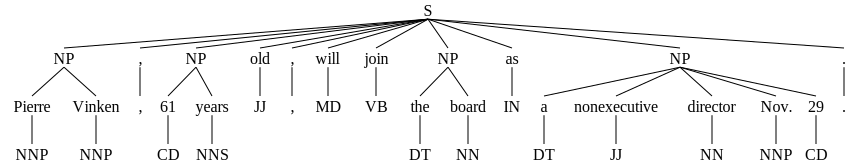

In [20]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank_chunk
treebank_chunk.tagged_sents()[0]
treebank_chunk.chunked_sents()[0]


In [ ]:
# Practical 7 :

In [ ]:
# a)	Define grammar using nltk. Analyze a sentence using the same.

In [ ]:
!pip install matplotlib


In [ ]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt

# Define the grammar
grammar1 = nltk.CFG.fromstring("""
S -> VP
VP -> VP NP
NP -> Det NP
Det -> 'that'
NP -> 'singularNoun'
NP -> 'flight'
VP -> 'Book'""")

sentence = "Book that flight"

# Tokenize the sentence
all_tokens = tokenize.word_tokenize(sentence)
print(all_tokens)

# Create a parser
parser = nltk.ChartParser(grammar1)

# Parse the sentence and print the tree structure
for tree in parser.parse(all_tokens):
    print(tree)
    # Plot the tree
    tree.pretty_print()
    plt.show()


['Book', 'that', 'flight']
(S (VP (VP Book) (NP (Det that) (NP flight))))
      S             
      |              
      VP            
  ____|____          
 |         NP       
 |     ____|____     
 VP  Det        NP  
 |    |         |    
Book that     flight



In [ ]:
# b)	Accept the input string with Regular expression of Finite Automaton: 101+.

In [ ]:
def FA(s):
  if len(s)<3:
    return "Rejected"
  if s[0]=='1':
    if s[1]=='0':
      if s[2]=='1':
        for i in range(3,len(s)):
          if s[i]!='1':
            return "Rejected"
        return "Accepted"
  return "Rejected"

inputs = ['1','10101','101','10111','01010','100','','10111101','1011111']
for i in inputs:
  print(FA(i))

Rejected
Rejected
Accepted
Accepted
Rejected
Rejected
Rejected
Rejected
Accepted


In [ ]:
# c) Accept the input string with Regular expression of FA: (a+b)*bba.

In [ ]:
def FA(s):
    size = 0
    for i in s:
        if i == 'a' or i == 'b':
            size += 1
        else:
            return "Rejected"
    if size >= 3:
        # check the last 3 elements
        if s[size-3] == 'b' and s[size-2] == 'b' and s[size-1] == 'a':
            return "Accepted"
        else:
            return "Rejected"
    else:
        return "Rejected"
inputs = ['bba', 'ababbba', 'abba', 'abb', 'baba', 'bbb', '']
for i in inputs:
    print(FA(i))


Accepted
Accepted
Accepted
Rejected
Rejected
Rejected
Rejected


In [ ]:
# d)	Implementation of Deductive Chart Parsing using context free grammar and a given sentence.

In [ ]:
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')
grammar1 = nltk.CFG.fromstring("""
S -> VP
VP -> VP NP | 'Book'
NP -> Det NP | 'flight'
Det -> 'that'
Det -> 'a'
NP -> 'flight'
""")
sentence = "Book that flight"
all_tokens = tokenize.word_tokenize(sentence)
print(all_tokens)
parser = nltk.ChartParser(grammar1)
for tree in parser.parse(all_tokens):
    tree.pretty_print()
    print(tree)
    plt.figure(figsize=(10, 10))
    #tree.draw()
    plt.savefig(tree_filename)
    plt.close()
    #tree.draw()  # Uncomment this if you have a graphical display available



import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
nltk.download('punkt')
grammar1 = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | VP PP
PP -> P NP
NP -> Det N | Det N PP | 'I'
Det -> 'a' | 'my'
N -> 'bird' | 'balcony'
V -> 'saw'
P -> 'in'
""")
sentence = "I saw a bird in my balcony"
all_tokens = tokenize.word_tokenize(sentence)
parser = nltk.ChartParser(grammar1)
for tree in parser.parse(all_tokens):
    tree_filename = "parse_tree.png"
    tree.pretty_print()
    plt.figure(figsize=(10, 10))
    #tree.draw()
    plt.savefig(tree_filename)
    plt.close()
    print("Parse tree saved as:", tree_filename)

In [ ]:
# Practical 8 : Study PorterStemmer, LancasterStemmer, RegexpStemmer, SnowballStemmer Study WordNetLemmatizer

In [ ]:
# PorterStemmer
import nltk
from nltk.stem import PorterStemmer
word_stemmer = PorterStemmer()
print(word_stemmer.stem('writing'))

#LancasterStemmer
import nltk
from nltk.stem import LancasterStemmer
Lanc_stemmer = LancasterStemmer()
print(Lanc_stemmer.stem('writing'))

#RegexpStemmer
import nltk
from nltk.stem import RegexpStemmer
Reg_stemmer = RegexpStemmer('ing$|s$|e$|able$', min=4)
print(Reg_stemmer.stem('writing'))

#SnowballStemmer
import nltk
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')
print(english_stemmer.stem ('writing'))

#WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("word :\tlemma")
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

In [ ]:
# Practical 9 : Implement Naive Bayes classifier

In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn

In [ ]:
pip install nltk

In [ ]:

import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
# select any spam.csv dataset from github.
sms_data = pd.read_csv("spamdata.csv", encoding='latin-1')
# using below code line check the column names.
print(sms_data.columns)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()
corpus = []
for i in range (0,len(sms_data)):
  s1 = re.sub('[^a-zA-Z]',repl = ' ',string = sms_data['Message'][i])  # put 2nd column name here.
  s1.lower()
  s1 = s1.split()
  s1 = [stemming.stem(word) for word in s1 if word not in
        set(stopwords.words('english'))]
  s1 = ' '.join(s1)
  corpus.append(s1)
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer =CountVectorizer()
x = countvectorizer.fit_transform(corpus).toarray()
print(x)
y = sms_data['Category'].values # put 1st column name here.
print(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,
stratify=y,random_state=2)
from sklearn.naive_bayes import MultinomialNB
multinomialnb = MultinomialNB()
multinomialnb.fit(x_train,y_train)
y_pred = multinomialnb.predict(x_test)
print(y_pred)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))
print("accuracy_score: ",accuracy_score(y_test,y_pred))

In [ ]:
# Practical 10 A : Speech Tagging

In [ ]:
# i) Speech tagging using spacy

In [ ]:
import spacy

sp = spacy.load('en_core_web_sm')
sen = sp(u"I like to play football. I hated it in my childhood though")
print(sen.text)
print(sen[7].pos_)
print(sen[7].tag_)
print(spacy.explain(sen[7].tag_))

for word in sen:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

sen = sp(u'Can you google it?')
word = sen[2]
print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

sen = sp(u'Can you search it on google?')
word = sen[5]
print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

# Finding the Number of POS Tags
sen = sp(u"I like to play football. I hated it in my childhood though")
num_pos = sen.count_by(spacy.attrs.POS)

for k,v in sorted(num_pos.items()):
    print(f'{k}. {sen.vocab[k].text:{8}}: {v}')

# Visualizing Parts of Speech Tags
from spacy import displacy

sen = sp(u"I like to play football. I hated it in my childhood though")
displacy.serve(sen, style='dep', options={'distance': 120})


I like to play football. I hated it in my childhood though
VERB
VBD
verb, past tense
I            PRON       PRP      pronoun, personal
like         VERB       VBP      verb, non-3rd person singular present
to           PART       TO       infinitival "to"
play         VERB       VB       verb, base form
football     NOUN       NN       noun, singular or mass
.            PUNCT      .        punctuation mark, sentence closer
I            PRON       PRP      pronoun, personal
hated        VERB       VBD      verb, past tense
it           PRON       PRP      pronoun, personal
in           ADP        IN       conjunction, subordinating or preposition
my           PRON       PRP$     pronoun, possessive
childhood    NOUN       NN       noun, singular or mass
though       ADV        RB       adverb
google       VERB       VB       verb, base form
google       PROPN      NNP      noun, proper singular
85. ADP     : 1
86. ADV     : 1
92. NOUN    : 2
94. PART    : 1
95. PRON    : 4
97. PUNCT  

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
# ii) Speech tagging using nktl

In [ ]:
import nltk
nltk.download('state_union')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
#create our training and testing data:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")
#train the Punkt tokenizer like:
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
# tokenize:
tokenized = custom_sent_tokenizer.tokenize(sample_text)
def process_content():
 try:
  for i in tokenized[:2]:
    words = nltk.word_tokenize(i)
    tagged = nltk.pos_tag(words)
    print(tagged)
 except Exception as e:
  print(str(e))
process_content()

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

In [ ]:
# Practical 10 B : Statistical parsin

In [ ]:
# i)	Usage of Give and Gave in the Penn Treebank sample

In [ ]:
import nltk
nltk.download('treebank')
import nltk.parse.viterbi
import nltk.parse.pchart

def give(t):
    return t.label() == 'VP' and len(t) > 2 and t[1].label() == 'NP' \
        and (t[2].label() == 'PP-DTV' or t[2].label() == 'NP') \
        and ('give' in t[0].leaves() or 'gave' in t[0].leaves())

def sent(t):
    return ' '.join(token for token in t.leaves() if token[0] not in '*-0')


def print_node(t, width):
    output = "%s %s: %s / %s: %s" % \
        (sent(t[0]), t[1].label(), sent(t[1]), t[2].label(), sent(t[2]))
    if len(output) > width:
        output = output[:width] + "..."
    print(output)

for tree in nltk.corpus.treebank.parsed_sents():
    for t in tree.subtrees(give):
        print_node(t, 72)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


gave NP: the chefs / NP: a standing ovation
give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
give NP: it / PP-DTV: to the politicians
gave NP: them / NP: similar help
give NP: them / NP: 
give NP: only French history questions / PP-DTV: to students in a Europe...
give NP: federal judges / NP: a raise
give NP: consumers / NP: the straight scoop on the U.S. waste crisis
gave NP: Mitsui / NP: access to a high-tech medical product
give NP: Mitsubishi / NP: a window on the U.S. glass industry
give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
give NP: your Foster Savings Institution / NP: the gift of hope and free...
give NP: market operators / NP: the authority to suspend trading in futu...
gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
give NP: the Transportation Department / NP: up to 50 days to review any...
give NP: the president / NP: such power
give NP: me / NP: the heebie-jeebies
give NP: holders / NP: 

In [ ]:
# ii)	Probabilistic Parser

In [ ]:
import nltk
from nltk import PCFG

grammar = PCFG.fromstring('''
    NP -> NNS [0.5] | JJ NNS [0.3] | NP CC NP [0.2]
    NNS -> "men" [0.1] | "women" [0.2] | "children" [0.3] | NNS CC NNS [0.4]
    JJ -> "old" [0.4] | "young" [0.6]
    CC -> "and" [0.9] | "or" [0.1]
''')

print(grammar)

viterbi_parser = nltk.ViterbiParser(grammar)
token = "old men and women".split()
obj = viterbi_parser.parse(token)

print("Output: ")
for x in obj:
    print(x)


Grammar with 11 productions (start state = NP)
    NP -> NNS [0.5]
    NP -> JJ NNS [0.3]
    NP -> NP CC NP [0.2]
    NNS -> 'men' [0.1]
    NNS -> 'women' [0.2]
    NNS -> 'children' [0.3]
    NNS -> NNS CC NNS [0.4]
    JJ -> 'old' [0.4]
    JJ -> 'young' [0.6]
    CC -> 'and' [0.9]
    CC -> 'or' [0.1]
Output: 
(NP (JJ old) (NNS (NNS men) (CC and) (NNS women))) (p=0.000864)


In [ ]:
# Practical 10 C : Malt parsing: Parse a sentence and draw a tree using malt parsing.

In [ ]:
# 1) Java should be installed.
# 2) maltparser-1.7.2 zip file should be copied in C:\Users\Beena Kapadia\AppData\Local\Programs\Python\Python39 folder and should be extracted in the same folder.
# 3) engmalt.linear-1.7.mco file should be copied to C:\Users\Beena Kapadia\AppData\Local\Programs\Python\Python39 folder

# Link for engmalt.linear-1.7.mco - https://maltparser.org/mco/english_parser/engmalt.linear-1.7.mco
# Link for maltparser-1.7.2 zip http://maltparser.org/dist/maltparser-1.9.2.zip

In [ ]:
from nltk.parse import malt

# Initialize MaltParser
mp = malt.MaltParser('maltparser-1.7.2', 'engmalt.linear-1.7.mco')

# Parse a sentence
parsed_tree = mp.parse_one('I saw a bird from my window.'.split()).tree()

# Visualize the parse tree
parsed_tree.draw()

In [ ]:
# Practical 11 A: Multiword Expressions in NLP

In [ ]:
from nltk.tokenize import MWETokenizer
from nltk import sent_tokenize, word_tokenize
s = '''Good cake cost Rs.1500\kg in Mumbai. Please buy me one of them.\n\nThanks.'''
mwe = MWETokenizer([('New', 'York'), ('Hong', 'Kong')], separator='_')
for sent in sent_tokenize(s):
  print(mwe.tokenize(word_tokenize(sent)))

['Good', 'cake', 'cost', 'Rs.1500\\kg', 'in', 'Mumbai', '.']
['Please', 'buy', 'me', 'one', 'of', 'them', '.']
['Thanks', '.']


In [ ]:
# Practical 11 B: Normalized Web Distance and Word Similarity

In [ ]:
pip install textdistance

In [ ]:
import numpy as np
import re
import textdistance  # pip install textdistance
# we will need scikit-learn>=0.21
import sklearn  # pip install sklearn
from sklearn.cluster import AgglomerativeClustering

texts = [
    'Reliance supermarket', 'Reliance hypermarket', 'Reliance', 'Reliance', 'Reliance downtown', 'Relianc market',
    'Mumbai', 'Mumbai Hyper', 'Mumbai dxb', 'mumbai airport',
    'k.m trading', 'KM Trading', 'KM trade', 'K.M. Trading', 'KM.Trading'
]


def normalize(text):
    """ Keep only lower-cased text and numbers"""
    return re.sub('[^a-z0-9]+', ' ', text.lower())


def group_texts(texts, threshold=0.4):
    """ Replace each text with the representative of its cluster"""
    normalized_texts = np.array([normalize(text) for text in texts])
    distances = 1 - np.array([
        [textdistance.jaro_winkler(one, another) for one in normalized_texts]
        for another in normalized_texts
    ])
    clustering = AgglomerativeClustering(
        distance_threshold=threshold,  # this parameter needs to be tuned carefully
        affinity="precomputed", linkage="complete", n_clusters=None
    ).fit(distances)
    centers = dict()
    for cluster_id in set(clustering.labels_):
        index = clustering.labels_ == cluster_id
        centrality = distances[:, index][index].sum(axis=1)
        centers[cluster_id] = normalized_texts[index][centrality.argmin()]
    return [centers[i] for i in clustering.labels_]


print(group_texts(texts))

['reliance', 'reliance', 'reliance', 'reliance', 'reliance', 'reliance', 'mumbai', 'mumbai', 'mumbai', 'mumbai', 'km trading', 'km trading', 'km trading', 'km trading', 'km trading']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Practical 11 C: Word Sense Disambiguation

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_first_sense(word, pos=None):
 if pos:
  synsets = wn.synsets(word,pos)
 else:
  synsets = wn.synsets(word)
 return synsets[0]
best_synset = get_first_sense('bank')
print ('%s: %s' % (best_synset.name, best_synset.definition))
best_synset = get_first_sense('set','n')
print ('%s: %s' % (best_synset.name, best_synset.definition))
best_synset = get_first_sense('set','v')
print ('%s: %s' % (best_synset.name, best_synset.definition))

[nltk_data] Downloading package wordnet to /root/nltk_data...


<bound method Synset.name of Synset('bank.n.01')>: <bound method Synset.definition of Synset('bank.n.01')>
<bound method Synset.name of Synset('set.n.01')>: <bound method Synset.definition of Synset('set.n.01')>
<bound method Synset.name of Synset('put.v.01')>: <bound method Synset.definition of Synset('put.v.01')>
